In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [0]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [0]:
train = pd.read_csv('Train_v2.csv')
test  = pd.read_csv('Test_v2.csv')
full_data = [train, test]
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [0]:
split=train.shape[0]
dataset=pd.concat([train,test],axis=0)

In [0]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  33610 rows
This dataset contains  13 columns


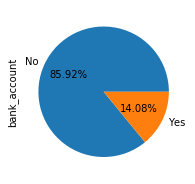

In [0]:
plt.figure(figsize=(3,3))
pd.Series(dataset['bank_account']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

No Bank Account:  20212
Yes Bank Account:  3312


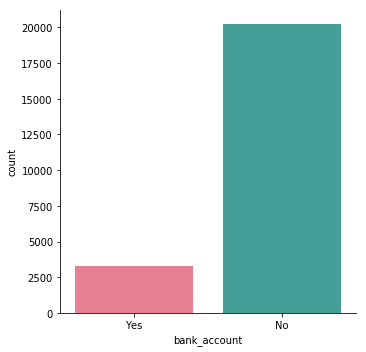

In [0]:
M,B=train['bank_account'].value_counts()
print('No Bank Account: ' ,M)
print('Yes Bank Account: ' ,B)
sns.catplot(x='bank_account',kind='count',data=train, palette="husl")

In [0]:
# Checking the missing values

missing_df =train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(train.shape[0]-missing_df['Missing Values Count'])/train.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,country,0,100.0
1,year,0,100.0
2,uniqueid,0,100.0
3,bank_account,0,100.0
4,location_type,0,100.0
5,cellphone_access,0,100.0
6,household_size,0,100.0
7,age_of_respondent,0,100.0
8,gender_of_respondent,0,100.0
9,relationship_with_head,0,100.0


In [0]:
Yes=train.loc[train['bank_account']=='Yes',:]
Yes.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing


In [0]:
No=train.loc[train['bank_account']=='No',:]
No.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
dataset.drop(['uniqueid'],inplace=True,axis=1)

In [0]:
# Converted to binary the target to help later with  Modelling and Plots 

dataset['bank_account'] = dataset['bank_account'].map({'Yes':1, 'No':0})

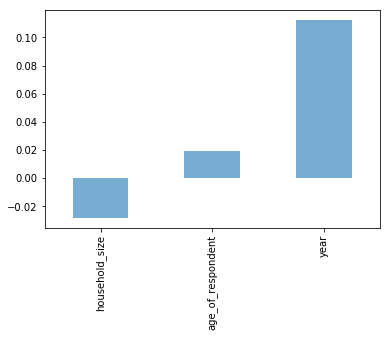

In [0]:
# Observe the Correlation to the diagnosis

tst = dataset.corr()['bank_account'].copy()
tst = tst.drop('bank_account')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

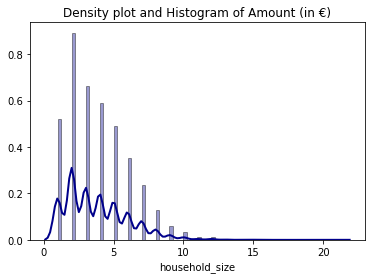

In [0]:
# Radius.Mean Visualization
# Density Plot and Histogram of radius.mean variable of the dataset


sns.distplot(dataset.household_size, 
             bins=80, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Density plot and Histogram of Amount (in €)')
plt.show()

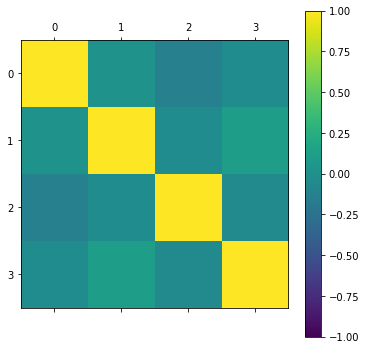

In [0]:
# Pandas Scatter Matrix

from pandas.plotting import scatter_matrix

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

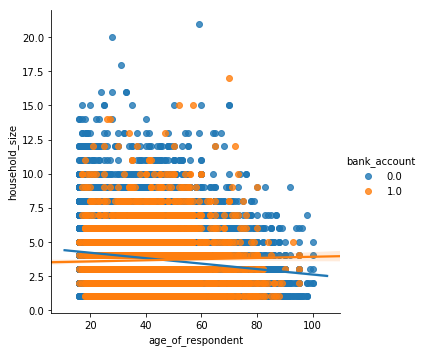

In [0]:
sns.lmplot(x = 'age_of_respondent', y= 'household_size', hue = 'bank_account',data = dataset)

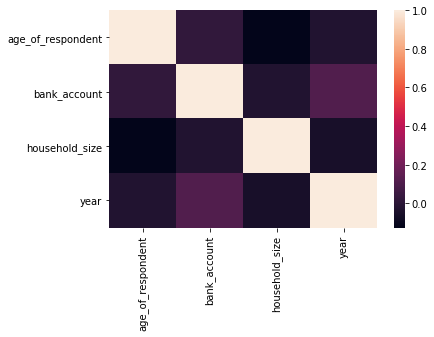

In [0]:
# Generating the correlation heatmap

corr = dataset.corr()
sns.heatmap(corr)

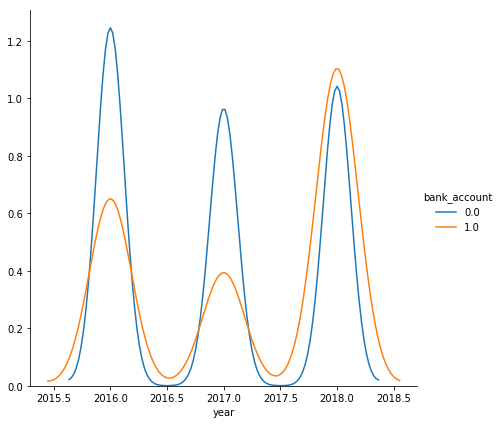

In [0]:
# Distribution density plot KDE (kernel density estimate)

sns.FacetGrid(dataset, hue="bank_account", height=6).map(sns.kdeplot, "year").add_legend()
plt.show()

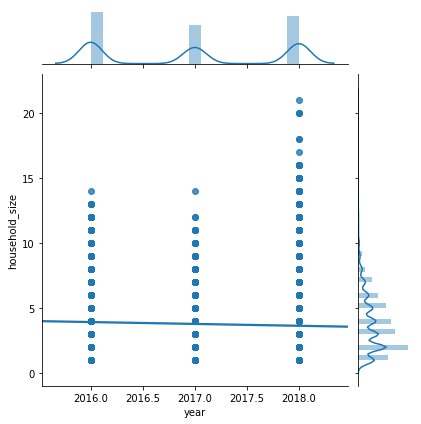

In [0]:
sns.jointplot("year", "household_size", data=dataset, kind="reg")

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

L_en = LabelEncoder()
O_en = OneHotEncoder(sparse=False)

one_hot_categories = ['country','education_level','gender_of_respondent','location_type','job_type', 'cellphone_access', 'relationship_with_head', 'marital_status'] #attributes to convert to 1hot

for category in one_hot_categories: #iterate over attributes
    out1 = L_en.fit_transform(dataset[[category]].values.ravel())    
    out2 = O_en.fit_transform(out1.reshape(-1,1)).astype('int')

    for i, name in enumerate(L_en.classes_):
            dataset[name] = out2[:,i] # make new column filled with 0s, 1s

dataset.drop(one_hot_categories , axis=1, inplace=True) #drop original colsdf

In [0]:
dataset['bank_account']=dataset['bank_account'].map({'Yes':1,'No':0})

In [0]:

# Normalizing the dataset

x = (dataset -np.min(dataset))/(np.max(dataset)-np.min(dataset)).values

In [0]:
train=dataset[:split]
test=dataset[split:]

In [0]:
test.drop(['bank_account'],axis=1,inplace=True)

In [0]:
test.shape

(10086, 40)

In [0]:
X = train.drop('bank_account', axis=1).values  
y = train['bank_account'].values

#set seed for reproducability
SEED = 8

#Split dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [0]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [0]:
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    

The Optimal number of Neighbors is 11 


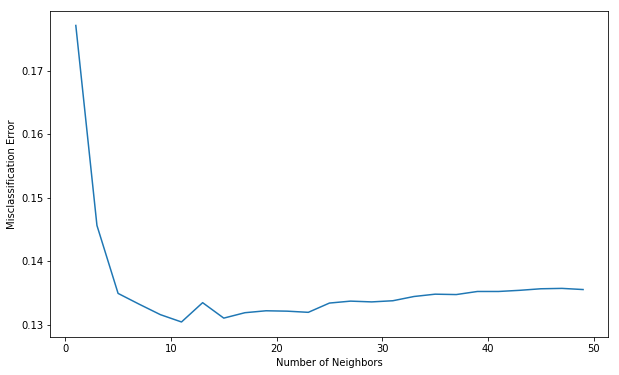

In [0]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The Optimal number of Neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

[0.325 0.153 0.279 0.164 0.241 0.145 0.211 0.141 0.19  0.126 0.173 0.117
 0.141 0.111 0.14  0.108 0.128 0.103 0.117 0.101 0.117 0.092 0.111 0.085
 0.101 0.086 0.095 0.082 0.09  0.076 0.089 0.07  0.082 0.069 0.074 0.067
 0.072 0.061 0.066 0.054 0.065 0.055 0.061 0.054 0.059 0.051 0.058 0.051
 0.055]


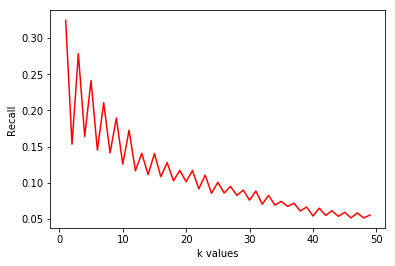

In [0]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

In [0]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}


In [0]:
seed=8

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost

models = []
models.append(('Logistic Regression',LogisticRegression(random_state=seed)))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))
models.append(('Quadratic Discriminnat Analysis',QuadraticDiscriminantAnalysis()))
models.append(('Support Vector Machine',SVC(random_state=seed,gamma='scale')))

ensembles = []
ensembles.append(('Random Forest Classifier', RandomForestClassifier(random_state=seed,n_estimators=100)))
ensembles.append(('Ada Boost Classifier', AdaBoostClassifier(random_state=seed)))
ensembles.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=seed)))
ensembles.append(('XGB Classifier', XGBClassifier(random_state=seed)))

In [0]:
# Models evaluation function
def get_score_models(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # All our models implement the 'decision_function' method
    # It is not the case of all our ensembles
    y_score = model.decision_function(X_test)
    
    compare(y_test,y_pred,y_score)
    
# Ensembles evaluation function
def get_score_ensembles(ensemble,X_train,X_test,y_train,y_test):
    ensemble.fit(X_train,y_train)
    y_pred = ensemble.predict(X_test)
    
    # All our ensembles implement the 'predict_proba' method
    # It is not the case of all our models
    y_score = ensemble.predict_proba(X_test)[:,1]
    
    compare(y_test,y_pred,y_score)

# Print metrics and graph function
def compare(y_test,y_pred,y_score):
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    
    print('Recall:',recall_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Area under the curve:',average_precision_score(y_test,y_score))
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.step(recall, precision, alpha=0.4, color='b', where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0, 1.05])
    plt.xlim([0, 1])
    plt.title('Precision-Recall curve')
    plt.show()

---------- Logistic Regression ----------
Confusion matrix:
[[5933  129]
 [ 662  334]]
Recall: 0.3353413654618474
Precision: 0.7213822894168467
Area under the curve: 0.5770146806247299


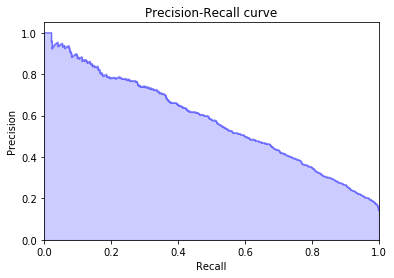

---------- Linear Discriminant Analysis ----------
Confusion matrix:
[[5816  246]
 [ 598  398]]
Recall: 0.39959839357429716
Precision: 0.6180124223602484
Area under the curve: 0.5715043056669911


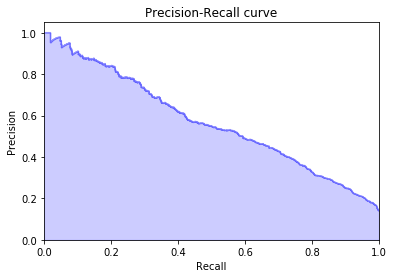

---------- Quadratic Discriminnat Analysis ----------
Confusion matrix:
[[5594  468]
 [ 860  136]]
Recall: 0.13654618473895583
Precision: 0.2251655629139073
Area under the curve: 0.17961325853901247


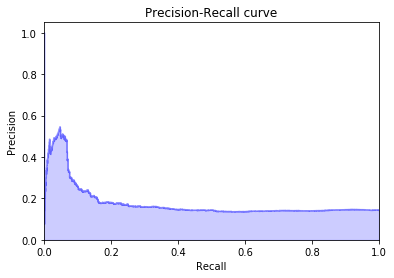

---------- Support Vector Machine ----------
Confusion matrix:
[[6062    0]
 [ 996    0]]
Recall: 0.0
Precision: 0.0
Area under the curve: 0.40292521591406855


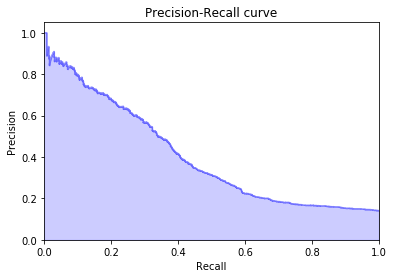

In [0]:
# Evaluation of each model
for name,model in models:
    print('----------',name,'----------')
    get_score_models(model,X_train,X_test,y_train,y_test)

---------- Random Forest Classifier ----------
Confusion matrix:
[[5715  347]
 [ 604  392]]
Recall: 0.39357429718875503
Precision: 0.530446549391069
Area under the curve: 0.48992177593911984


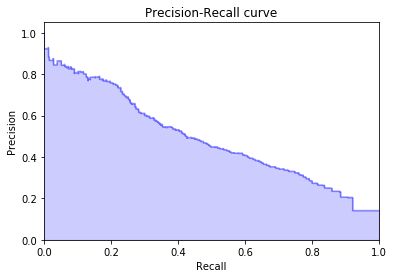

---------- Ada Boost Classifier ----------
Confusion matrix:
[[5919  143]
 [ 653  343]]
Recall: 0.34437751004016065
Precision: 0.7057613168724279
Area under the curve: 0.5757900749779649


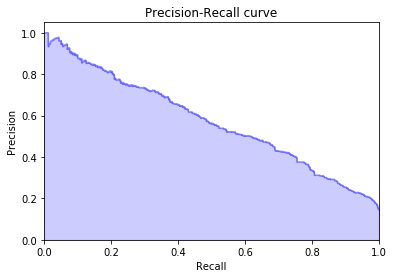

---------- Gradient Boosting Classifier ----------
Confusion matrix:
[[5939  123]
 [ 654  342]]
Recall: 0.3433734939759036
Precision: 0.7354838709677419
Area under the curve: 0.6030615940475275


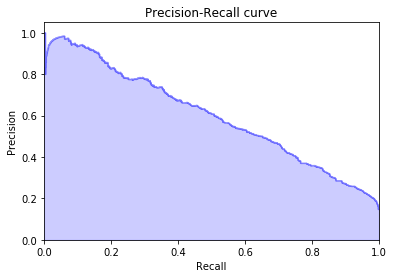

---------- XGB Classifier ----------
Confusion matrix:
[[5944  118]
 [ 658  338]]
Recall: 0.3393574297188755
Precision: 0.7412280701754386
Area under the curve: 0.6051716827329944


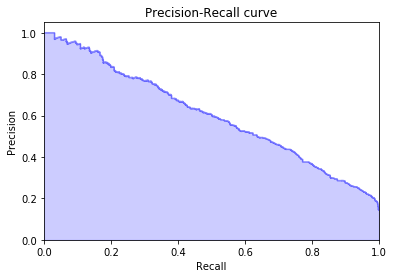

In [0]:
# Evaluation of each ensemble method
for name,ensemble in ensembles:
    print('----------',name,'----------')
    get_score_ensembles(ensemble,X_train,X_test,y_train,y_test)

Text(0, 0.5, 'explained_variance_ratio_')

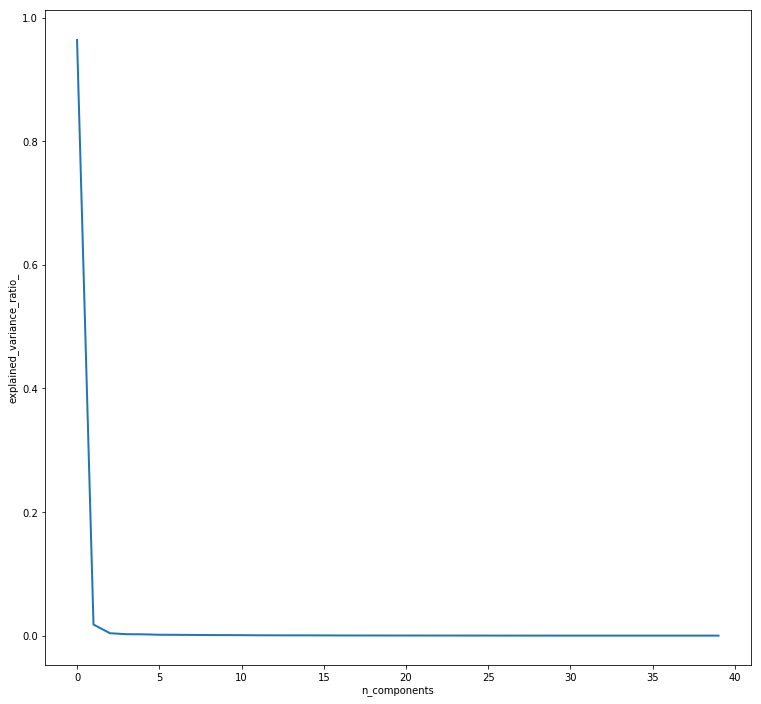

In [0]:
# Normalization of the data

x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
x_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')


#### Hyper Parameter Tuning

In [0]:
#Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  88.79


In [0]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  85.17


In [0]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier(random_state=42)


# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=50,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
# Prediction on test set
y_pred = clf.predict(X_test)

# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  88.25


In [0]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Prediction on test data
y_pred = rf.predict(X_test)

# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )


Accuracy of Random Forest model :  88.52


In [0]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

In [0]:
# Prediction on test data
y_pred = svc.predict(X_test)

# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

In [0]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

In [0]:
# Prediction on test data
y_pred = knn.predict(X_test)


# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

In [0]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', ' Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

In [0]:
#Instantiate DecisionTree
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

#random_state=1 for reproducability

#Fit dt to the training set
dt.fit(X_train, y_train)

#Predict test set labels
y_pred =dt.predict(X_test)

#metrics
import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.8787191839047889

In [0]:
predictions = dt.predict(test)
predictions

array([1., 1., 0., ..., 0., 0., 0.])

In [0]:
test1=pd.read_csv('Test_v2.csv')
test1['unique_id'] = test1[['uniqueid','country']].apply(lambda x: ' x '.join(x), axis=1)

In [0]:
submission = pd.DataFrame()
submission['unique_id'] = test1['unique_id']
submission['bank_account'] = predictions.reshape((predictions.shape[0]))
submission.to_csv('submission_df.csv',index=False)

In [0]:
dataA=pd.read_csv("submission_df.csv")

In [0]:
dataA['bank2']=test['age_of_respondent']

In [0]:
dataA.head()

,unique_id,bank_account,bank2
0,uniqueid_6056 x Kenya,1.0,30
1,uniqueid_6060 x Kenya,1.0,51
2,uniqueid_6065 x Kenya,0.0,77
3,uniqueid_6072 x Kenya,0.0,39
4,uniqueid_6073 x Kenya,0.0,16


In [0]:
import pandas as pd

In [0]:
from google.colab import files
dataA.to_csv('dataA.csv') 
files.download('dataA.csv')

In [0]:
predictions= dt.predict(test)

submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"], "bank_account": predictions})

submission_df.to_csv("Submission_file.csv",index=False)


In [0]:
submission = pd.DataFrame(index=test.index,columns=['uniqueid','bank_account'])

submission['uniqueid'] = test['uniqueid']

submission['bank_account'] = dt.predict(X_test)

submission.to_csv('yourpath.csv',index=False)

### Other Models

In [0]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#metrics

import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.8904788892037404

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

(0, 22)

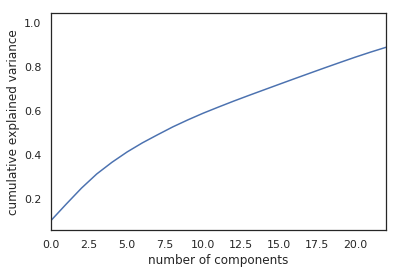

In [0]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,22,2)

In [0]:
pca=PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(16466, 10)
(7058, 10)


In [0]:
logreg=LogisticRegression(random_state=1)
score = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))


Accuracy: 88.18%
Precision : 70.21%
Recall score: 27.72%


In [0]:
knn=KNeighborsClassifier()
scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_pca, y_train,test_size=0.3,random_state=21)
knn.fit(X1_train,y1_train)
y_pred=knn.predict(X1_test)
con=confusion_matrix(y1_test,y_pred)
print('Confusion matrix:')
print(con)

Accuracy: 88.18%
Precision : 57.95%
Recall score: 35.06%
Confusion matrix:
[[4091  168]
 [ 442  239]]


In [0]:
knn=KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
knn_cv.fit( X_train_pca, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 13}


In [0]:
knn_cv=KNeighborsClassifier(n_neighbors= 13)
score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='precision'))
r_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn_cv: %s" % '{:.2%}'.format(score_knn_cv))
print ('Precision for knn_cv: %s' %'{:.2%}' .format(p_score_knn_cv))
print ('Recall score for knn_cv: %s' % '{:.2%}'.format(r_score_knn_cv))

score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn= np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='precision'))
r_score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn: %s" % '{:.2%}'.format(score_knn))
print ('Precision for knn: %s' %'{:.2%}' .format(p_score_knn))
print ('Recall score for knn: %s' % '{:.2%}'.format(r_score_knn))


Accuracy for knn_cv: 87.73%
Precision for knn_cv: 62.79%
Recall score for knn_cv: 32.13%
Accuracy for knn: 87.33%
Precision for knn: 57.77%
Recall score for knn: 38.45%


In [0]:
svc=SVC(random_state=1)
scores_svc = np.mean(cross_val_score(svc,  X_train_pca, y_train, scoring='accuracy'))
p_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(scores_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc: 88.24%
Precision for svc: 68.86%
Recall score for svc: 31.83%


In [0]:
svc=SVC(random_state=1)
param_grid = {"C": [0.001,0.1,1,10], 'degree':[1,3,10]}
svc_cv=GridSearchCV(svc,param_grid=param_grid,cv = 3, n_jobs = -1, verbose = 0)
svc_cv.fit(X_train_pca, y_train)
svc_cv.best_params_

{'C': 1, 'degree': 1}

In [0]:
svc_cv= SVC(random_state=1, C=1, degree=1)
score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='precision'))
r_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc_cv: %s" % '{:.2%}'.format(score_svc_cv))
print ('Precision for svc_cv: %s' %'{:.2%}' .format(p_score_svc_cv))
print ('Recall score for svc_cv: %s' % '{:.2%}'.format(r_score_svc_cv))

score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc= np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(score_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc_cv: 88.35%
Precision for svc_cv: 68.86%
Recall score for svc_cv: 31.83%
Accuracy for svc: 88.35%
Precision for svc: 68.86%
Recall score for svc: 31.83%


In [0]:
dt=DecisionTreeClassifier(random_state=7)
score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='accuracy'))
p_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='precision'))
r_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for Decision Tree: %s" % '{:.2%}'.format(score_dt))
print ('Precision Decision Tree: %s' %'{:.2%}' .format(p_score_dt))
print ('Recall score Decision Tree: %s' % '{:.2%}'.format(r_score_dt))

Accuracy for Decision Tree: 83.46%
Precision Decision Tree: 40.85%
Recall score Decision Tree: 39.38%


In [0]:
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='accuracy'))
p_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='precision'))
r_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))
print ('Precision RandomForest:: %s' %'{:.2%}' .format(p_score_rf))
print ('Recall score RandomForest:: %s' % '{:.2%}'.format(r_score_rf))

Accuracy for RandomForest: 86.23%
Precision RandomForest:: 51.64%
Recall score RandomForest:: 32.94%


In [0]:
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}
# Create a basic model
rf = RandomForestClassifier(random_state=21)
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
rf_cv.fit(X_train_pca, y_train)
print(rf_cv.best_params_)
score=rf_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

In [0]:
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)
score_rf_cv = np.mean(cross_val_score(rf_cv,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf_cv: %s" % '{:.2%}'.format(score_rf_cv))

score_rf = np.mean(cross_val_score(rf,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf: %s" % '{:.2%}'.format(score_rf))

### First Models 

In [0]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# Importing other tools
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [0]:
#defining random seed
seed=8

# Creating Models
logreg = LogisticRegression(solver='lbfgs', random_state=seed)
lda = LinearDiscriminantAnalysis()
svc = SVC(random_state=seed, probability=True)
lin_svc = LinearSVC(random_state=seed)
l_svc = CalibratedClassifierCV(lin_svc, cv=5)
dtree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(10, random_state=seed)
gdb = GradientBoostingClassifier(random_state=seed)
adb = AdaBoostClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
knn = KNeighborsClassifier()

first_models = [logreg, lda, svc, l_svc,
                dtree, rf, gdb, adb, xgb, knn]
first_model_names = ['Logistic Regression', 'LDA', 'SVC', 'Linear SVC',
                    'Decision Tree', 'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors'] 

# Defining other steps
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=seed)
std_sca = StandardScaler()


In [0]:
train_size = X_train.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    accuracy = np.zeros(n_folds)
    recall = np.zeros(n_folds)
    
    for i, (train_ix, val_ix) in enumerate(skf.split(X_train, y_train)):
        x_tr,  y_tr  = X_train.iloc[train_ix], y_train.iloc[train_ix]
        x_val, y_val = X_train.iloc[val_ix],   y_train.iloc[val_ix]
        
        model_pipeline.fit(x_tr, y_tr)
        val_pred = model_pipeline.predict(x_val)
        
        oof_pred[val_ix, n] = model_pipeline.predict_proba(x_val)[:,1]
        
        fold_acc = accuracy_score(y_val, val_pred)
        fold_rec = recall_score(y_val, val_pred)
        
        accuracy[i] = fold_acc
        recall[i] = fold_rec
    
    scores.append({'Accuracy'          : accuracy.mean(),
                   'Recall'            : recall.mean()})

In [0]:
measure_cols = ['Accuracy', 'Recall']#, 'Accuracy Std.Dev.', 'Recall Std.Dev.']

first_scores = pd.DataFrame(columns=measure_cols)

for name, score in zip(first_model_names, scores):
    
    new_row = pd.Series(data=score, name=name)
    first_scores = first_scores.append(new_row)
    
first_scores = first_scores.sort_values('Recall', ascending=False)
first_scores

In [0]:
submission = pd.DataFrame(index=test.index,columns=['uniqueid','bank_account'])

submission['uniqueid'] = test['uniqueid']

submission['bank_account'] = amodel.predict(X_test)

## create submit_file

submission.to_csv('yourpath.csv',index=False)

In [0]:
submission = pd.DataFrame(index=test.index,columns=['uniqueid','bank_account'])

submission['uniqueid'] = test['uniqueid']

submission['bank_account'] = amodel.predict(X_test)

## create submit_file

submission.to_csv('yourpath.csv',index=False)